# Contrast Enhancement using Histogram Equalization

Image enhancement is a fundamental process in digital image processing that aims to improve the visual appearance of an image or to enhance certain features so that the image is more suitable for analysis by humans or machines. Enhancement techniques focus mainly on improving contrast, brightness, and visibility of details without altering the actual content of the image.

Histogram equalization is an intensity-based contrast enhancement technique that improves the contrast of an image by redistributing pixel intensity values so that they span the available dynamic range more uniformly. It is primarily designed for single-channel images, where pixel values represent only intensity information.

In [2]:
#importing necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Importing RGB image using OpenCV

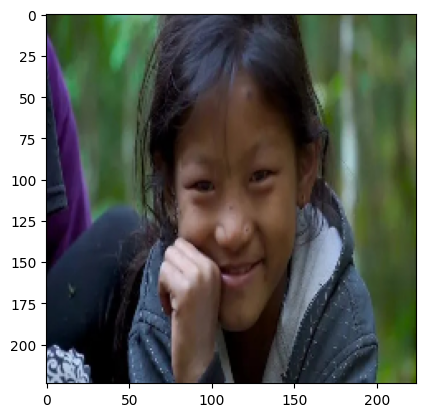

In [3]:
image = cv2.imread('IPimg2.jpg')
image = cv2.resize(image, (224, 224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

/tmp/ipykernel_13911/4029049829.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(flatten,25,[0,256],color = "b")


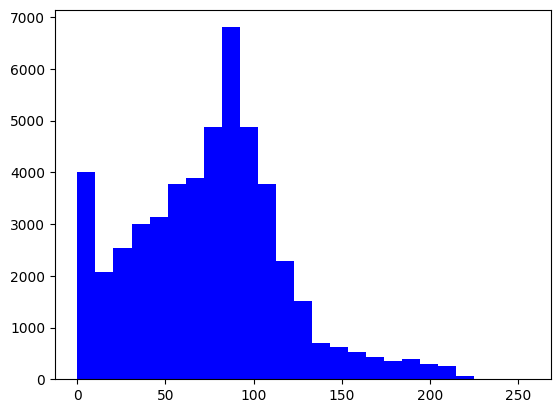

In [4]:
lab = cv2.cvtColor(image,cv2.COLOR_RGB2LAB)
l,a,b = cv2.split(lab)

flatten = l.flatten()

plt.hist(flatten,25,[0,256],color = "b")
plt.show()

/tmp/ipykernel_13911/1580654593.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(l_eq.flatten(),25,[0,256],color = "b")


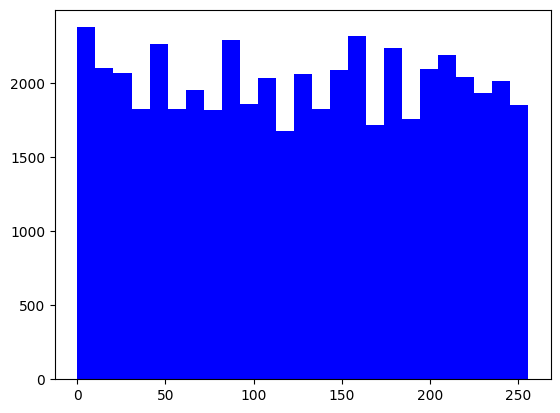

In [5]:
# Global Histogram Equalization
l_eq = cv2.equalizeHist(l)
lab_eq = cv2.merge((l_eq, a, b))
img_eq = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2RGB)

plt.hist(l_eq.flatten(),25,[0,256],color = "b")
plt.show()

/tmp/ipykernel_13911/715251901.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(l_ahe.flatten(),25,[0,256],color = "b")


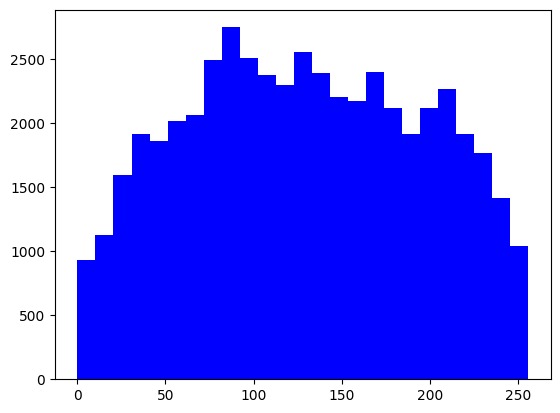

In [6]:
#AHE (Adaptive Histogram Equalization)
ahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8, 8))
l_ahe = ahe.apply(l)
lab_ahe = cv2.merge((l_ahe, a, b))
img_ahe = cv2.cvtColor(lab_ahe, cv2.COLOR_LAB2RGB)

plt.hist(l_ahe.flatten(),25,[0,256],color = "b")
plt.show()

/tmp/ipykernel_13911/1824639573.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(l_clahe.flatten(),25,[0,256],color = "b")


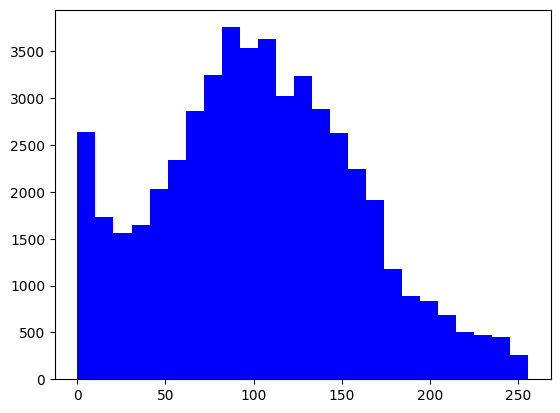

In [7]:
# CLAHE (Contrast Limited Adaptive Histogram Equalization) 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l_clahe = clahe.apply(l)
lab_clahe = cv2.merge((l_clahe, a, b))
img_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

plt.hist(l_clahe.flatten(),25,[0,256],color = "b")
plt.show()

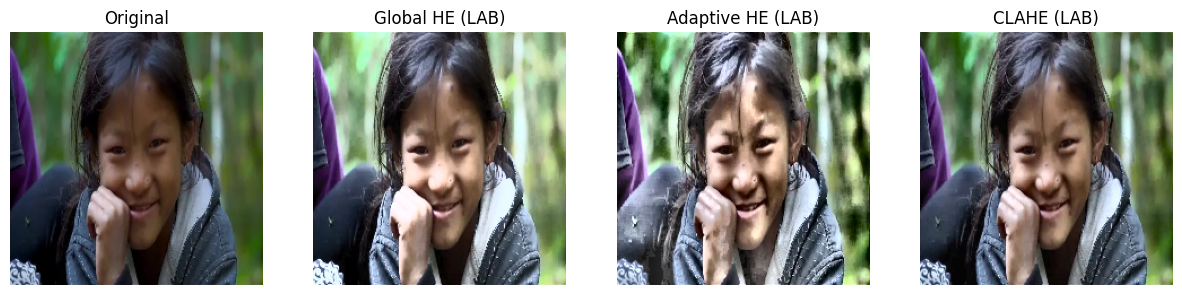

In [8]:
titles = ['Original', 'Global HE (LAB)', 'Adaptive HE (LAB)','CLAHE (LAB)']
images = [image, img_eq,img_ahe, img_clahe]

plt.figure(figsize=(15,5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.show()

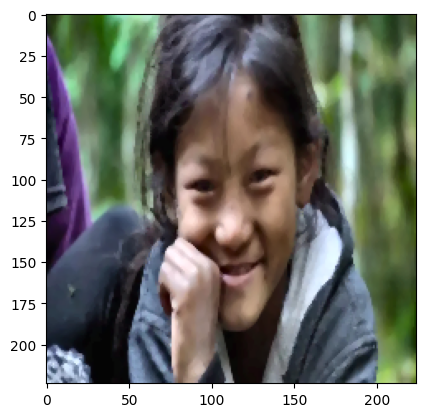

In [9]:
med_blur = cv2.medianBlur(img_clahe,3)
plt.imshow(med_blur)

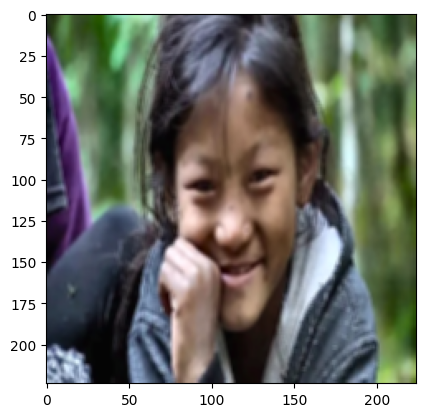

In [10]:
mean_blur = cv2.blur(img_clahe,(3,3))
plt.imshow(mean_blur)

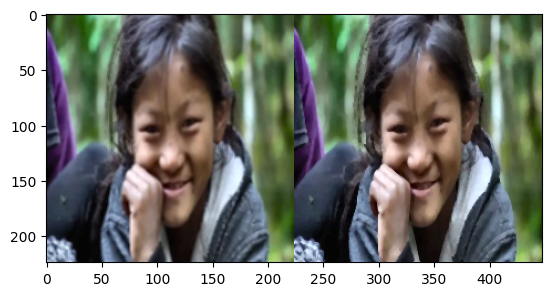

In [11]:
compare = np.concatenate((mean_blur, med_blur), axis=1)
plt.imshow(compare)

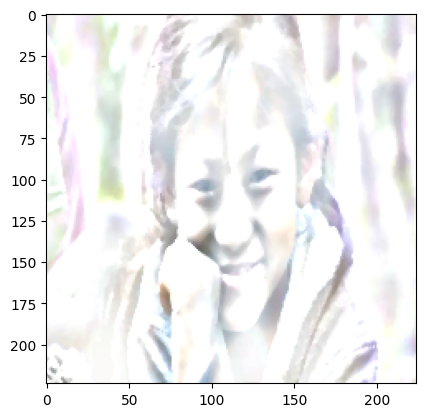

In [12]:
back_ground = cv2.medianBlur(img_clahe,ksize = 37)
mask = cv2.addWeighted(med_blur,1,back_ground,-1,255)
plt.imshow(mask)

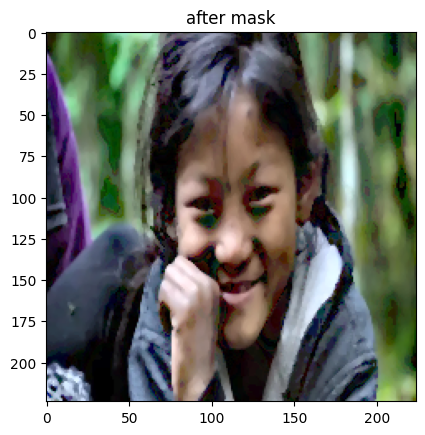

In [13]:
final_mask = cv2.bitwise_and(mask,med_blur)
plt.title("after mask")
plt.imshow(final_mask)

In [14]:
import math
from math import log10, sqrt
def PSNR(original, filter):
    mse = np.mean((original - filter) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [15]:
value = PSNR(img_clahe, med_blur)
print("psnr value:",value)

psnr value: 35.048050963753234


In [16]:
value = PSNR(img_clahe,mean_blur)
print("psnr value:",value)

psnr value: 33.03660694425794


### For grayscale image

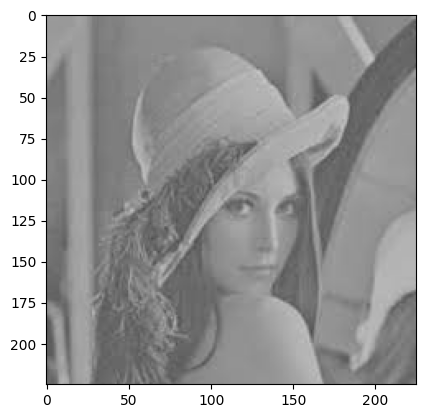

In [23]:
image1 = plt.imread('IPimg1.jpeg')

plt.imshow(image1,cmap = 'gray')

Text(0.5, 1.0, 'Histogram of Original Image')

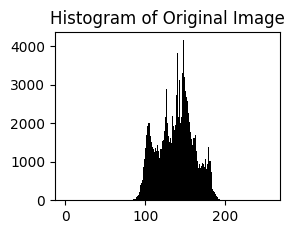

In [24]:
plt.subplot(2, 2, 4)
plt.hist(image1.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram of Original Image")


In [29]:
image1= cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)


In [30]:
global_eq1 = cv2.equalizeHist(image1)

Text(0.5, 1.0, 'Histogram of Equalized Image')

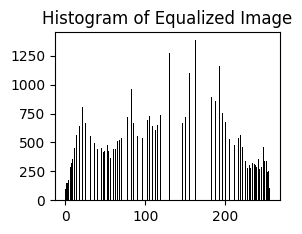

In [31]:
plt.subplot(2, 2, 4)
plt.hist(global_eq1.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram of Equalized Image")

Text(0.5, 1.0, 'Histogram of Adaptive Equalized Image')

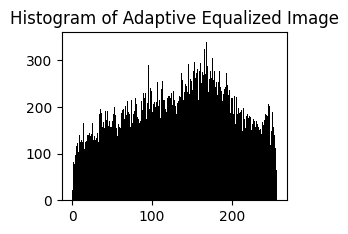

In [34]:
ahe1 = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(8, 8))  
ahe_img1 = ahe.apply(image1)

plt.subplot(2, 2, 4)
plt.hist(ahe_img1.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram of Adaptive Equalized Image")

Text(0.5, 1.0, 'Histogram of Contrast Limited Adaptive Equalized Image')

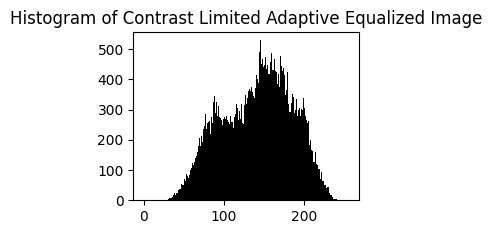

In [36]:
clahe1 = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))  
clahe_img1 = clahe1.apply(image1)

plt.subplot(2, 2, 4)
plt.hist(clahe_img1.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Histogram of Contrast Limited Adaptive Equalized Image")

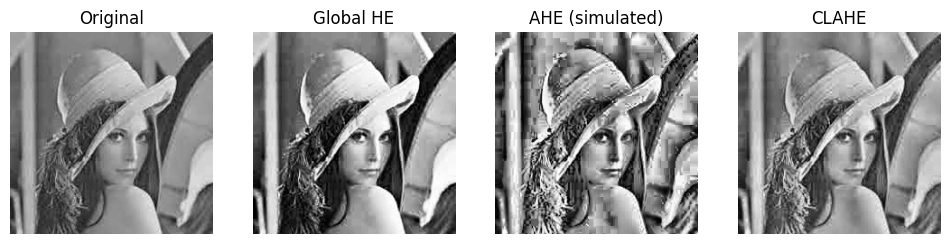

In [37]:
titles = ['Original', 'Global HE', 'AHE (simulated)', 'CLAHE']
images = [image1, global_eq1, ahe_img1, clahe_img1]

plt.figure(figsize=(12, 6))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

In [38]:
flatten1 = l.flatten()

/tmp/ipykernel_13911/3715383824.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(flatten1,25,[0,256],color = "black")


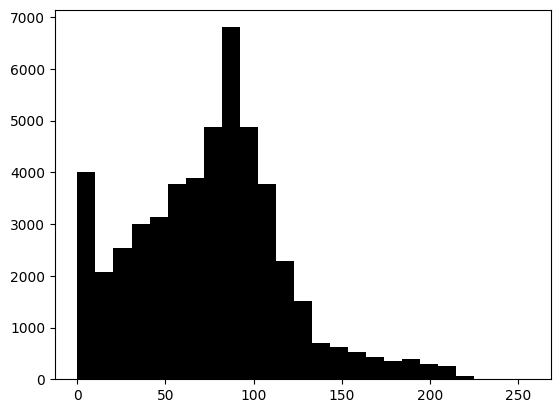

In [39]:
plt.hist(flatten1,25,[0,256],color = "black")
plt.show()

/tmp/ipykernel_13911/202188590.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(cl1.flatten(),25,[0,256],color = "black")


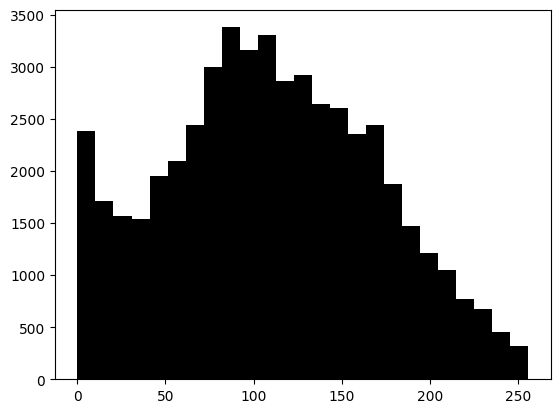

In [40]:
clahe1 = cv2.createCLAHE(clipLimit = 3.0,tileGridSize = ((8,8)))
cl1 = clahe1.apply(l)
plt.hist(cl1.flatten(),25,[0,256],color = "black")
plt.show()